In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [4]:
!wget $data -O data-week-3-hw.csv

--2023-09-29 15:21:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>]   6.75M  1.86MB/s    in 3.8s    

2023-09-29 15:21:51 (1.77 MB/s) - ‘data-week-3.csv’ saved [7077973/7077973]



In [125]:
usecols = [
    'room_type', 'neighbourhood_group',
    'latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
df = pd.read_csv('./hw/data-week3-hw.csv',usecols=usecols)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [126]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [128]:
# Display cateorical variables
df.describe(include=["O"])


,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,Manhattan,Entire home/apt
freq,21661,25409


In [129]:
df['room_type'].mode()

0    Entire home/apt
Name: room_type, dtype: object

In [130]:
strings = list(df.dtypes[df.dtypes == 'int'].index)
strings

['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [131]:
df_numerical = df.copy()
df_numerical=df_numerical.drop(['neighbourhood_group','room_type','price'],axis=1)
df_numerical.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


# Validation Setup

In [132]:
df_numerical.corr()


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.062747,0.059094,0.138516,-0.114713,0.082731
minimum_nights,0.024869,-0.062747,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.144303,0.172028,0.163732,0.225701,1.000000


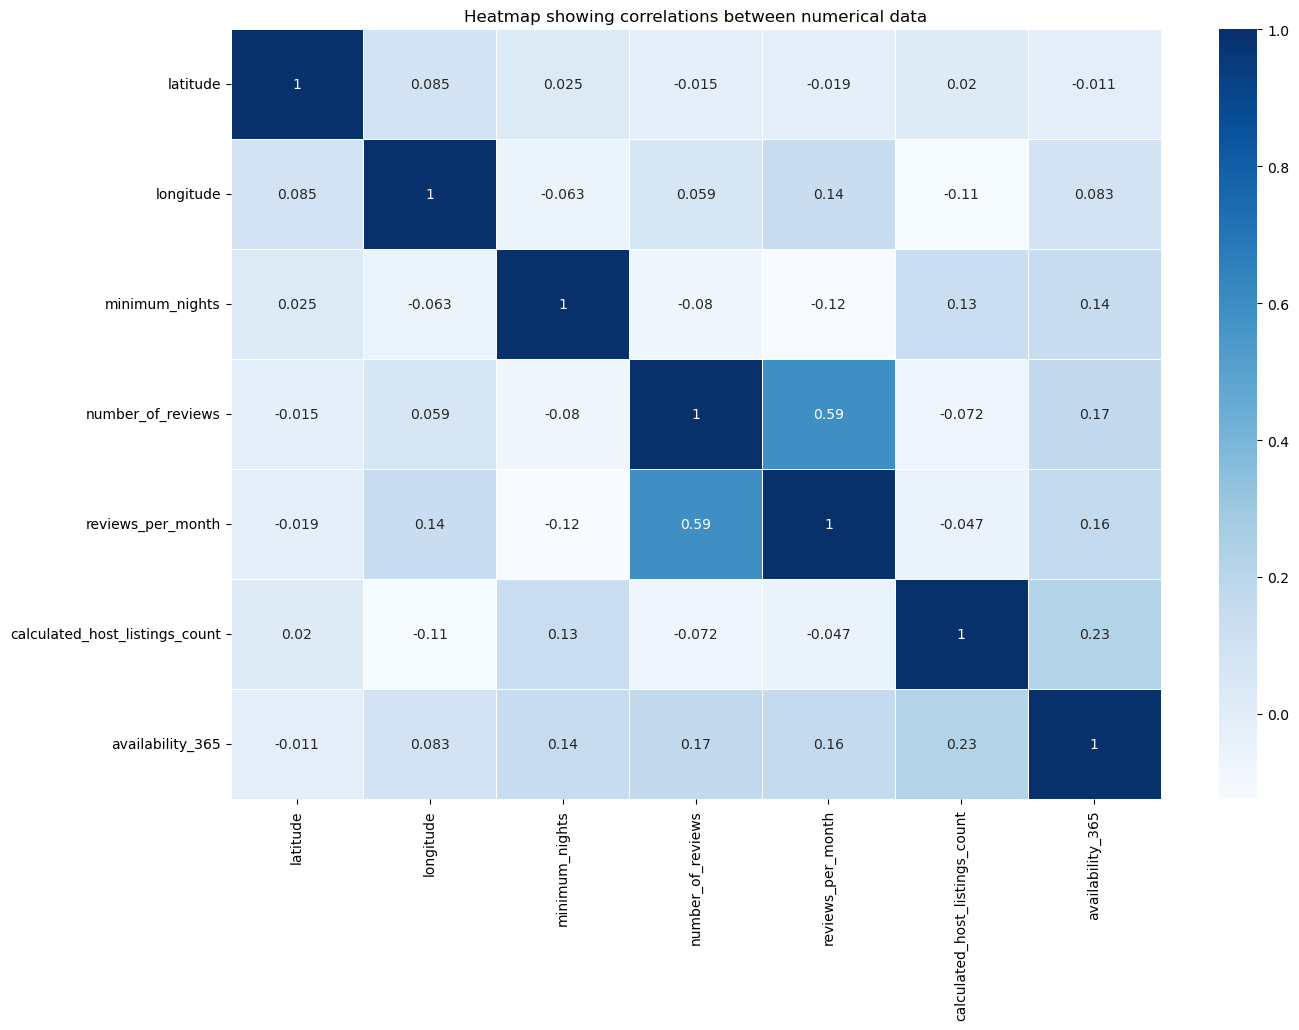

In [133]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_numerical.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [135]:
df_numerical['above_average'] = np.where(df['price'] >= 152,0,1 )
df_numerical

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,40.64749,-73.97237,1,9,0.21,6,365,1
1,40.75362,-73.98377,1,45,0.38,2,355,0
2,40.80902,-73.94190,3,0,0.00,1,365,1
3,40.68514,-73.95976,1,270,4.64,1,194,1
4,40.79851,-73.94399,10,9,0.10,1,0,1
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,0.00,2,9,1
48891,40.70184,-73.93317,4,0,0.00,2,36,1
48892,40.81475,-73.94867,10,0,0.00,1,27,1
48893,40.75751,-73.99112,1,0,0.00,6,2,1


In [171]:
from sklearn.model_selection import train_test_split

data_class = df.copy()
price_mean = df['price'].mean()
data_class['above_average'] = np.where(df['price'] >= price_mean,0,1)

data_class=data_class.drop('price',axis=1)





In [193]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train),len(df_val),len(df_test)


(29337, 9779, 9779)

# Mutual Info Score

In [194]:
from sklearn.metrics import mutual_info_score

cat = ['neighbourhood_group', 'room_type']

# Display cateorical variables
df.describe(include=['O'])

def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi
    

,MI
room_type,0.143917
neighbourhood_group,0.045730


# Classification

In [195]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [196]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [197]:
df_train = df_train.drop('above_average',axis=1)
df_val = df_val.drop('above_average',axis=1)
df_test = df_test.drop('above_average',axis=1)

In [198]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score

num = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']



model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
train_dict = df_train[cat+num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
model.fit(X_train,y_train)




TypeError: Ridge.__init__() got an unexpected keyword argument 'C'

# Validation Here 

In [178]:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.79


In [202]:
original_accuracy = accuracy

features = cat+num

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    
    print(c, original_accuracy - score, score)

neighbourhood_group 0.041354944268330085 0.74864505573167
room_type 0.06415891195418755 0.7258410880458125
latitude -6.033336741995132e-05 0.79006033336742
longitude -0.0004693731465384987 0.7904693731465385
minimum_nights 0.0002464464669189592 0.7897535535330811
number_of_reviews -0.001594232539114393 0.7915942325391144
reviews_per_month 0.0005532263012578698 0.7894467736987422
calculated_host_listings_count 0.001064526025155943 0.7889354739748441
availability_365 0.0019848655281726746 0.7880151344718274


LogisticRegression(random_state=42)

# Question Number 6

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [214]:
regression_data['price'] = np.log1p(regression_data['price'])


df_full_train, df_test = train_test_split(regression_data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train),len(df_val),len(df_test)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [218]:
train_dict = df_train[cat + num].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)



In [219]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.009
0.01 0.009
0.1 0.009
1 0.009
10 0.009
